Import Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Data Processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.spx

In [4]:
del df_com['dax']
del df_com['spx']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
#method (random.normal)creates random values from a normally distributed mean
#mean and stan deviation set to spx for easy comparison

In [6]:
df['wn'] = wn
#adds new colum to data frame; white noise

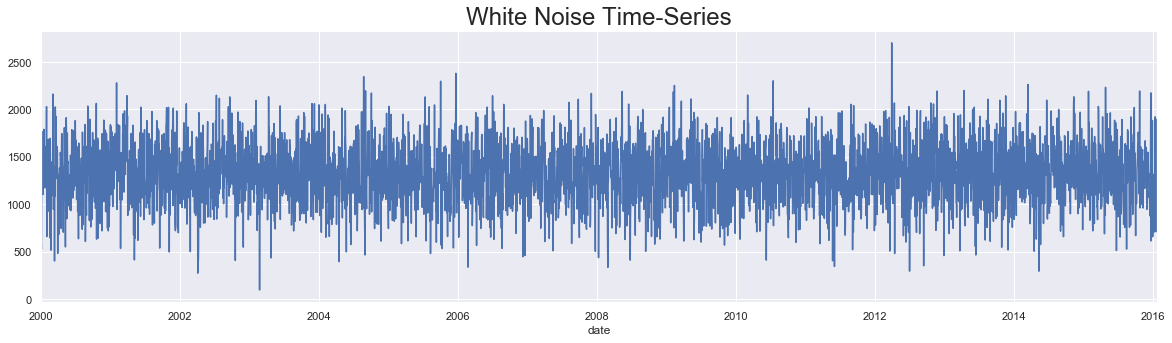

In [7]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

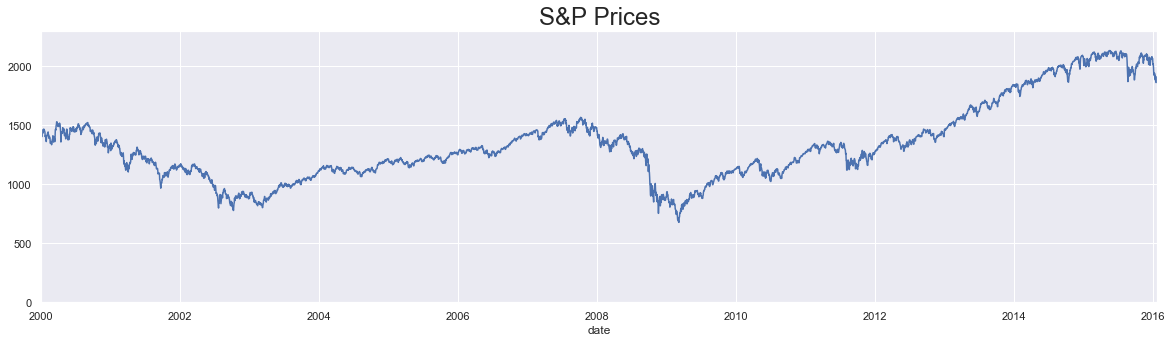

In [8]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P Prices", size= 24)
plt.ylim(0,2300)#setting limits for y-axis; easy to compare the graphs
plt.show()

Stationarity

In [9]:
sts.adfuller(df.market_value)
#test statistic 1st
#expresses the p value associated with the t statistic 2nd
#the no. of lags used in regression when doin t statistic 3rd
#no. of observation used 4th
#critical values from Dickey Fuller table 5/6/7th
#Estimates maximized infor criteria provided auto correlation 8th

(-0.7672618592522219,
 0.8285500421946395,
 2,
 4189,
 {'1%': -3.4319120223653132,
  '5%': -2.8622302155703507,
  '10%': -2.5671374076308826},
 34224.84474869841)

In [10]:
sts.adfuller(df.wn)
#wn is stationary
#No autocorrelation;no lags
#p value near 0

(-63.04933425971468,
 0.0,
 0,
 4191,
 {'1%': -3.4319112764905055,
  '5%': -2.8622298860748465,
  '10%': -2.5671372322228025},
 59872.31277473597)

Seasonality

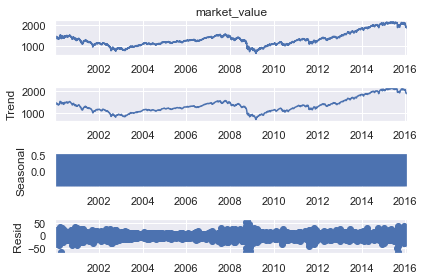

In [11]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
#assumes observed value = trend+seasonal+residual
s_dec_additive.plot() #to analyse result
plt.show()
#trend & observed look same;function uses previous period values as a trend-setter
#no concrete cyclical pattern
#errors of model estimate;the difference between true values and predictions for any periods
#suggests no seasonality

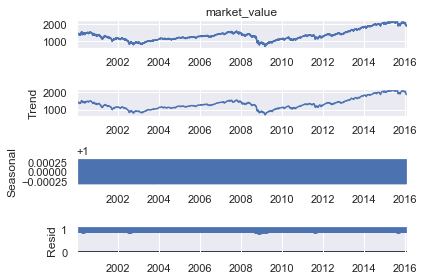

In [12]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
#similar to first one;no seasonality

ACF

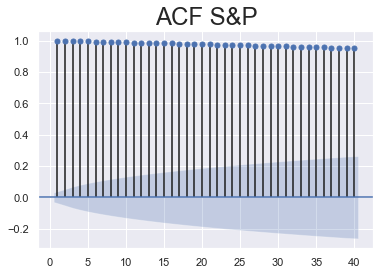

In [13]:
sgt.plot_acf(df.market_value,lags = 40, zero = False) 
#common practice analysis 1st 40lags;last 40 periods before current one
#false ensures we only observe a plot for higher lag values
plt.title("ACF S&P", size = 24)
plt.show()
#y-axis possible values for the autocorrelation(AC) coefficient
#blue area suggest Existence of AC
#lines higher than blue area G;show coefficient are significant
#Indicator of time depedence in the data
#ACF:shows direct & indirect effect
#40 lagged coefficient are significant & declining
#all between 0.9 & 1.0;effects hardly deteriorate over time

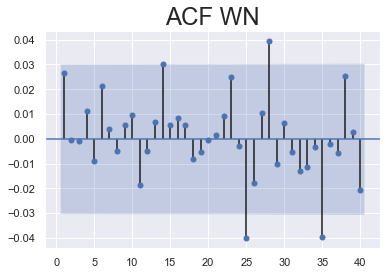

In [14]:
sgt.plot_acf(df.wn,lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()
#+ &- AC;lines outside blue area,Coefficient not significant, NO AC for any lags

PACF

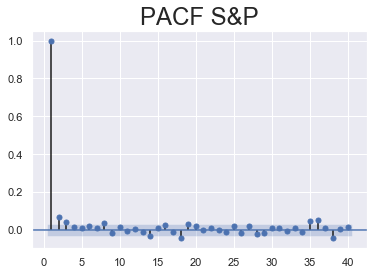

In [15]:
sgt.plot_pacf(df.market_value,lags = 40,zero = False, method = ('ols'))#ols:order of least squares
plt.title("PACF S&P", size = 24)
plt.show()
#Some values; e.g. 9th lag negative;mean higher values 9 periods ago result in lower values today
#PACF:cancels out additional channels a previous period value affecrts the present one
#shows direct effect

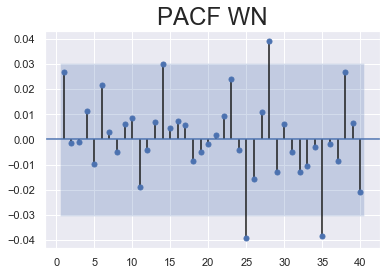

In [16]:
sgt.plot_pacf(df.wn,lags = 40,zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()
#no AC